## Sea Level Predictor

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
df = pd.read_csv('epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


## Statistical Analysis

In [13]:
# Basic statistics
print("Dataset Overview:")
print(f"Years covered: {df['Year'].min()} - {df['Year'].max()}")
print(f"Total data points: {len(df)}\n")

print("\nCSIRO Adjusted Sea Level Statistics:")
print(df['CSIRO Adjusted Sea Level'].describe())

print("\n\nYear-over-Year Change Analysis:")
df['Change'] = df['CSIRO Adjusted Sea Level'].diff()
print(f"Average annual change: {df['Change'].mean():.4f} inches")
print(f"Median annual change: {df['Change'].median():.4f} inches")
print(f"Total sea level rise: {df['CSIRO Adjusted Sea Level'].iloc[-1] - df['CSIRO Adjusted Sea Level'].iloc[0]:.2f} inches")

Dataset Overview:
Years covered: 1880 - 2013
Total data points: 134


CSIRO Adjusted Sea Level Statistics:
count    134.000000
mean       3.650341
std        2.485692
min       -0.440945
25%        1.632874
50%        3.312992
75%        5.587598
max        9.326772
Name: CSIRO Adjusted Sea Level, dtype: float64


Year-over-Year Change Analysis:
Average annual change: 0.0675 inches
Median annual change: 0.0709 inches
Total sea level rise: 8.98 inches


## Visualizations

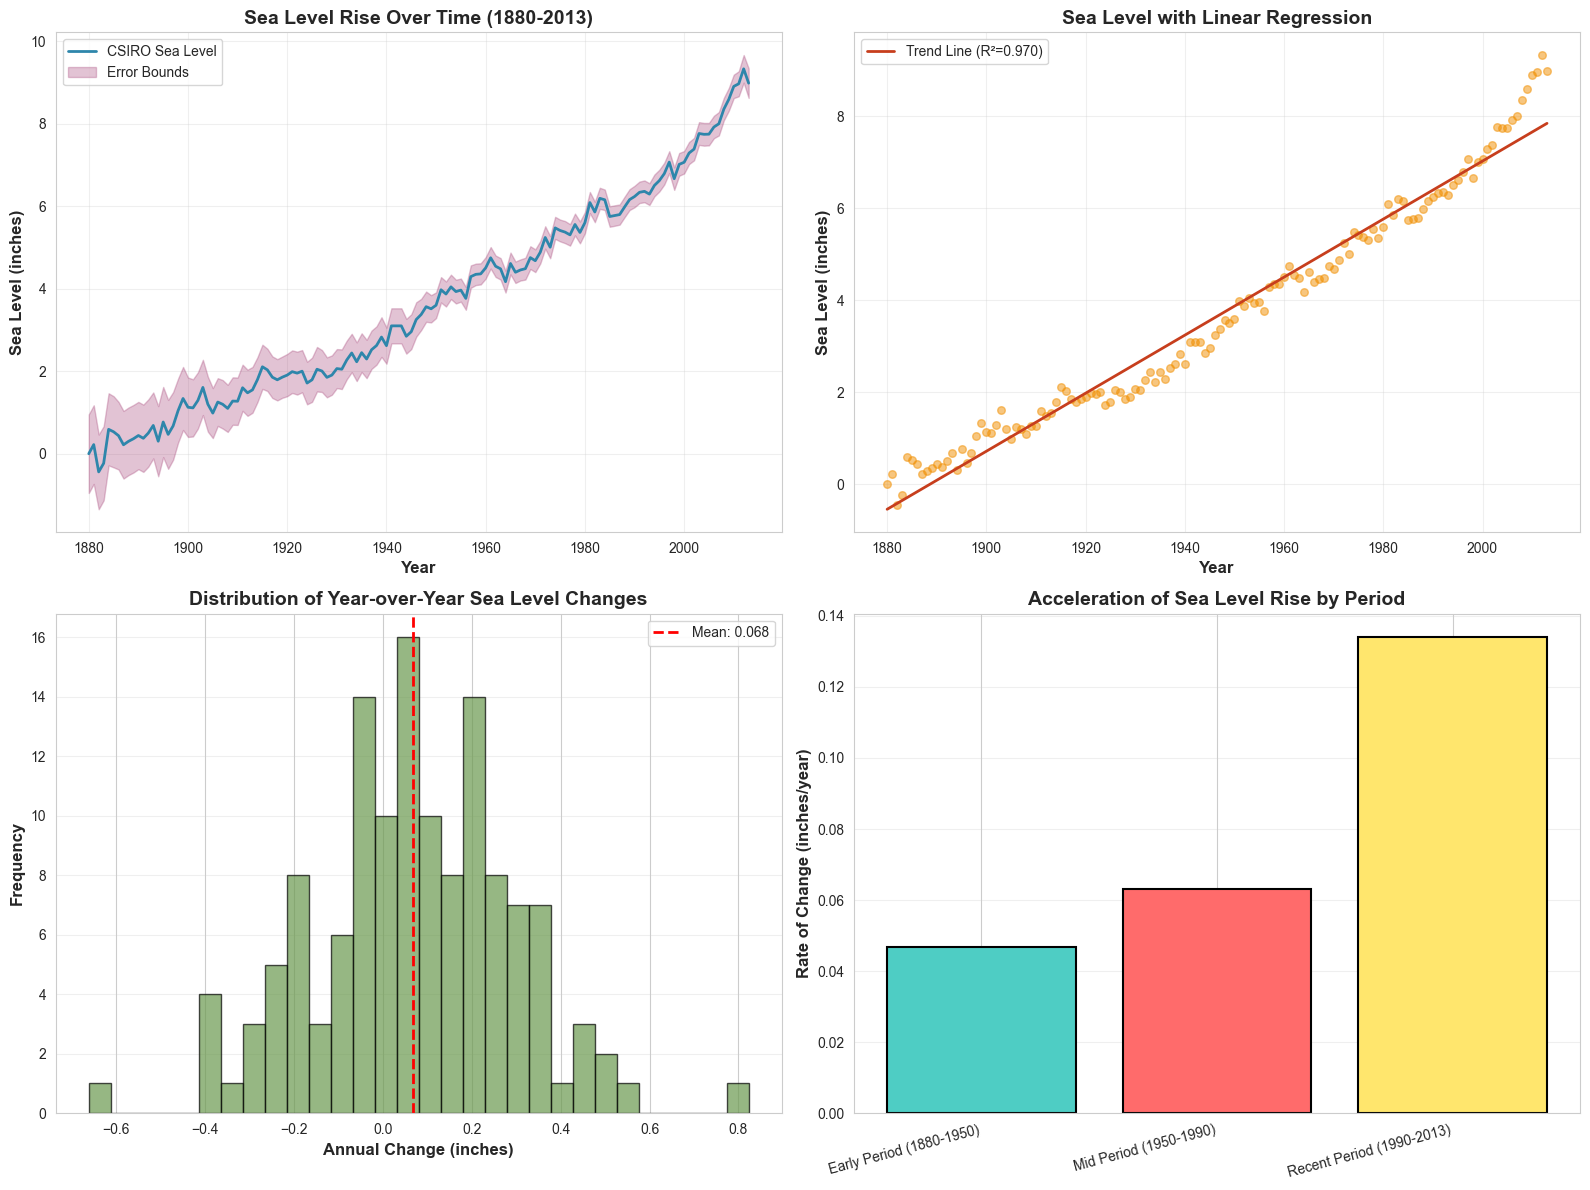


Linear Regression Results:
Slope: 0.0630 inches/year
R-squared: 0.9697
P-value: 3.788696979113155e-102


In [14]:
# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Time Series Plot
ax1 = axes[0, 0]
ax1.plot(df['Year'], df['CSIRO Adjusted Sea Level'], color='#2E86AB', linewidth=2, label='CSIRO Sea Level')
ax1.fill_between(df['Year'], df['Lower Error Bound'], df['Upper Error Bound'], 
                  alpha=0.3, color='#A23B72', label='Error Bounds')
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Sea Level (inches)', fontsize=12, fontweight='bold')
ax1.set_title('Sea Level Rise Over Time (1880-2013)', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Scatter Plot with Trend Line
ax2 = axes[0, 1]
ax2.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], alpha=0.5, s=30, color='#F18F01')

# Add linear regression
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
line = slope * df['Year'] + intercept
ax2.plot(df['Year'], line, color='#C73E1D', linewidth=2, label=f'Trend Line (R²={r_value**2:.3f})')

ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.set_ylabel('Sea Level (inches)', fontsize=12, fontweight='bold')
ax2.set_title('Sea Level with Linear Regression', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Distribution of Annual Changes
ax3 = axes[1, 0]
ax3.hist(df['Change'].dropna(), bins=30, color='#6A994E', alpha=0.7, edgecolor='black')
ax3.axvline(df['Change'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Change"].mean():.3f}')
ax3.set_xlabel('Annual Change (inches)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax3.set_title('Distribution of Year-over-Year Sea Level Changes', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# 4. Recent Acceleration (comparing different periods)
ax4 = axes[1, 1]
periods = [
    (1880, 1950, 'Early Period (1880-1950)'),
    (1950, 1990, 'Mid Period (1950-1990)'),
    (1990, 2013, 'Recent Period (1990-2013)')
]

avg_changes = []
period_labels = []

for start, end, label in periods:
    subset = df[(df['Year'] >= start) & (df['Year'] <= end)]
    slope_period, _, _, _, _ = stats.linregress(subset['Year'], subset['CSIRO Adjusted Sea Level'])
    avg_changes.append(slope_period)
    period_labels.append(label)

colors = ['#4ECDC4', '#FF6B6B', '#FFE66D']
ax4.bar(range(len(avg_changes)), avg_changes, color=colors, edgecolor='black', linewidth=1.5)
ax4.set_xticks(range(len(avg_changes)))
ax4.set_xticklabels(period_labels, rotation=15, ha='right')
ax4.set_ylabel('Rate of Change (inches/year)', fontsize=12, fontweight='bold')
ax4.set_title('Acceleration of Sea Level Rise by Period', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\nLinear Regression Results:")
print(f"Slope: {slope:.4f} inches/year")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value}")

## Future Predictions

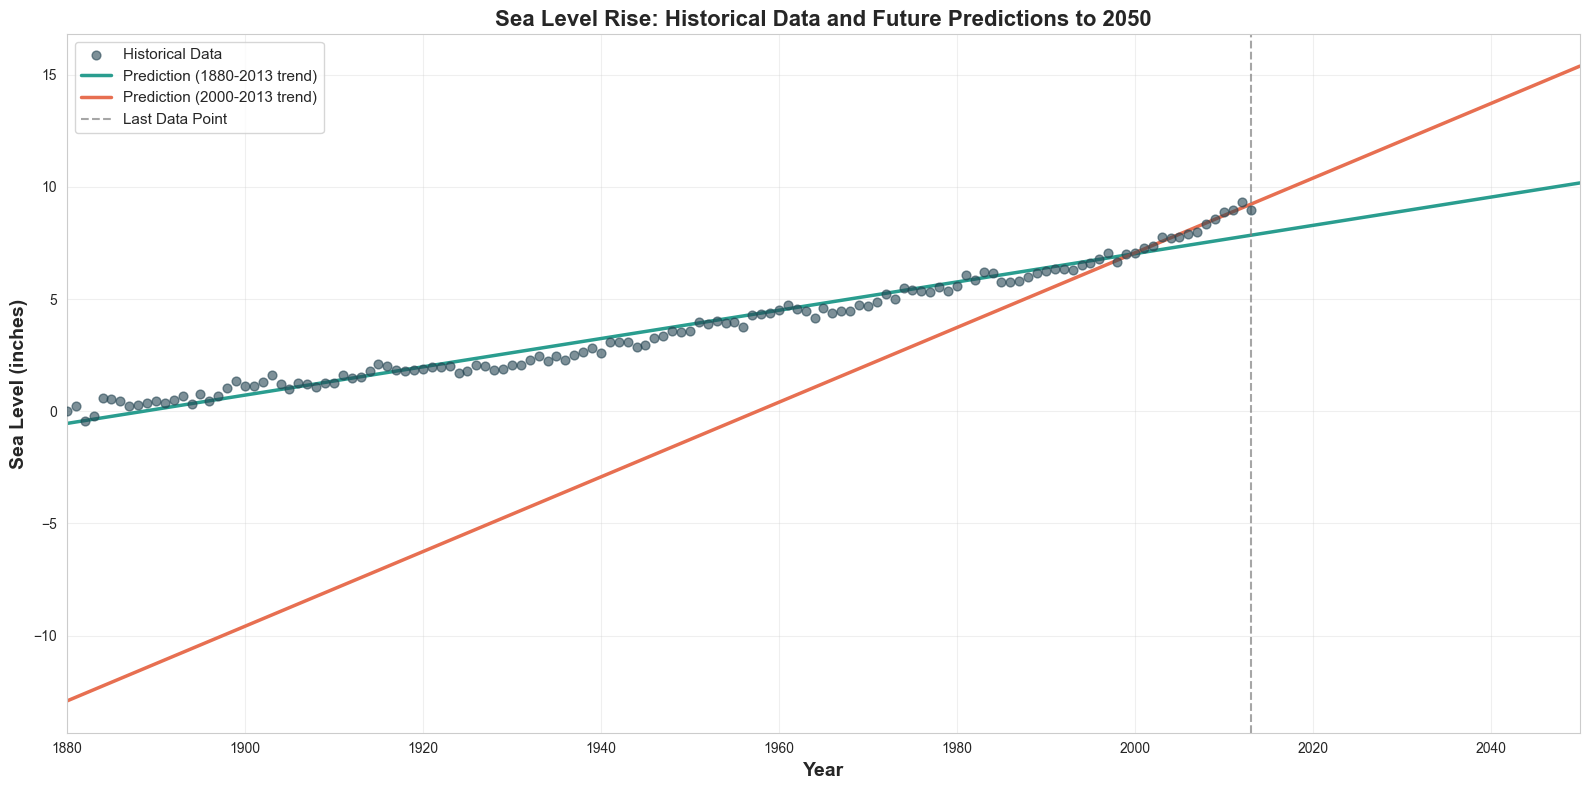


Predictions for 2050:
Based on full trend (1880-2013): 10.18 inches
Based on recent trend (2000-2013): 15.38 inches

Difference: 5.21 inches

Predicted rise from 2013 to 2050:
Based on full trend: 1.20 inches
Based on recent trend: 6.40 inches


In [15]:
# Create predictions to 2050
from scipy import stats

# Full dataset regression (1880-2013)
slope_full, intercept_full, r_full, _, _ = stats.linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

# Recent trend regression (2000-2013)
recent_df = df[df['Year'] >= 2000]
slope_recent, intercept_recent, r_recent, _, _ = stats.linregress(recent_df['Year'], recent_df['CSIRO Adjusted Sea Level'])

# Create future years
future_years = np.arange(1880, 2051)
pred_full = slope_full * future_years + intercept_full
pred_recent = slope_recent * future_years + intercept_recent

# Visualization
plt.figure(figsize=(16, 8))

# Plot historical data
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], alpha=0.6, s=40, 
            color='#264653', label='Historical Data', zorder=3)

# Plot predictions
plt.plot(future_years, pred_full, color='#2A9D8F', linewidth=2.5, 
         label=f'Prediction (1880-2013 trend)', linestyle='-')
plt.plot(future_years, pred_recent, color='#E76F51', linewidth=2.5, 
         label=f'Prediction (2000-2013 trend)', linestyle='-')

# Add vertical line at current year
plt.axvline(x=2013, color='gray', linestyle='--', linewidth=1.5, alpha=0.7, label='Last Data Point')

# Styling
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Sea Level (inches)', fontsize=14, fontweight='bold')
plt.title('Sea Level Rise: Historical Data and Future Predictions to 2050', fontsize=16, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim(1880, 2050)

plt.tight_layout()
plt.show()

# Print predictions
print("\nPredictions for 2050:")
print(f"Based on full trend (1880-2013): {slope_full * 2050 + intercept_full:.2f} inches")
print(f"Based on recent trend (2000-2013): {slope_recent * 2050 + intercept_recent:.2f} inches")
print(f"\nDifference: {abs((slope_full * 2050 + intercept_full) - (slope_recent * 2050 + intercept_recent)):.2f} inches")

print(f"\nPredicted rise from 2013 to 2050:")
last_value = df['CSIRO Adjusted Sea Level'].iloc[-1]
print(f"Based on full trend: {(slope_full * 2050 + intercept_full) - last_value:.2f} inches")
print(f"Based on recent trend: {(slope_recent * 2050 + intercept_recent) - last_value:.2f} inches")